In [29]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
# Set your OpenWeatherMap API key
api_key = 'fb365aa6104829b44455572365ff3b4e'
lat, lon = 18.184135, 74.610764
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [32]:
# Send a GET request to the API
response = requests.get(api_url)
weather_data = response.json()

In [33]:
# Extract data
data = []
for item in weather_data['list']:
    timestamp = pd.to_datetime(item['dt'], unit='s')
    temperature = item['main']['temp'] - 273.15  # Convert from Kelvin to Celsius
    humidity = item['main']['humidity']
    wind_speed = item['wind']['speed']
    weather_description = item['weather'][0]['description']
    data.append([timestamp, temperature, humidity, wind_speed, weather_description])

In [45]:
# Create DataFrame
weather_df = pd.DataFrame(data, columns=['Timestamp', 'Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)', 'Weather Description'])
weather_df.set_index('Timestamp', inplace=True)


In [40]:
# Calculate statistics
max_temp = weather_df['Temperature (°C)'].max()
max_temp


31.53000000000003

In [41]:
min_temp = weather_df['Temperature (°C)'].min()
min_temp

20.55000000000001

In [53]:
average_temperature = weather_df['Temperature (°C)'].mean()
average_temperature

25.68375000000002

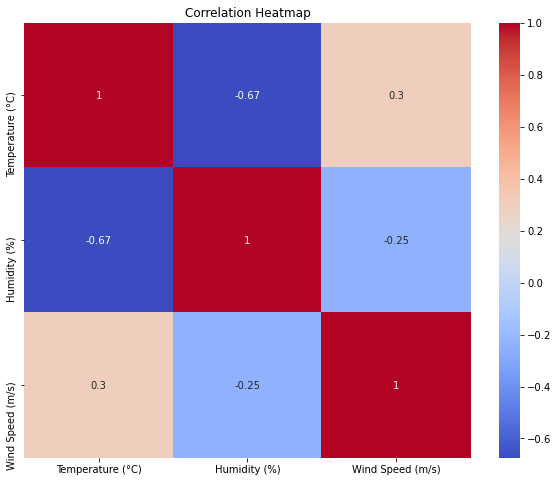

In [42]:

# Create correlation heatmap
correlation_matrix = weather_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



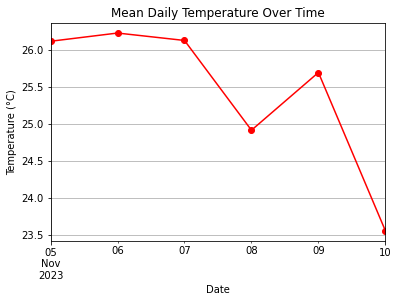

In [52]:
# Assuming 'weather_df' is your DataFrame
daily_mean_temp = weather_df['Temperature (°C)'].resample('D').mean()

daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


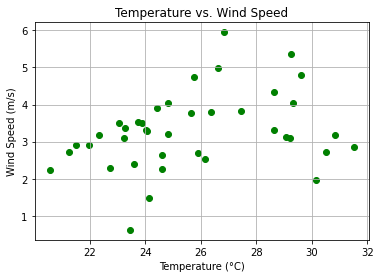

In [49]:
plt.scatter(weather_df['Temperature (°C)'], weather_df['Wind Speed (m/s)'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()